In [1]:
import pandas as pd

df = pd.read_csv("../../data/preprocessed_AQI_data.csv")
df.head()

,Country,AQI Category,CO AQI Value,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category
0,134,2,1,36,0,0,51,2
1,23,0,1,5,0,1,41,0
2,77,2,1,39,0,2,66,2
3,126,0,1,34,0,0,20,0
4,176,2,1,14,0,11,54,2


In [2]:
from sklearn.model_selection import train_test_split

# shuffle the data before splitting
df_shuffled = df.sample(frac=1, random_state=19)
X = df_shuffled.drop(["AQI Category"], axis=1)
y = df_shuffled["AQI Category"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=22
)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2845, 7) (11384, 7)
(2845,) (11384,)


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=19)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9980674631061138


Confusion Matrix:
[[5301    0    0    0    0    0]
 [   0   36    0    0    0    5]
 [   0    0 4741    0    0    0]
 [   0    0    0  609    9    0]
 [   0    0    0    7  581    0]
 [   0    0    0    1    0   94]]


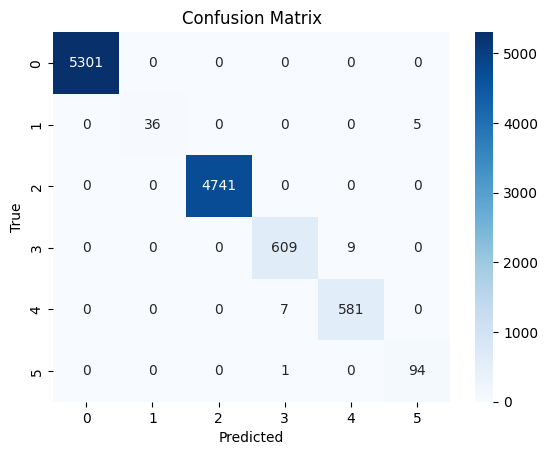

In [4]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
)
import seaborn as sns
import matplotlib.pyplot as plt

# get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="g")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2
)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END ma

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [6]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.9971885425327423


In [7]:
model2 = RandomForestClassifier(**grid_search.best_params_)
model2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
model2.fit(X_train, y_train)
y_preds = model2.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_preds)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9977160927617709


In [9]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
)
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_preds)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5301    0    0    0    0    0]
 [   0   36    0    0    0    5]
 [   0    0 4741    0    0    0]
 [   0    0    0  606   12    0]
 [   0    0    0    7  581    0]
 [   0    0    0    2    0   93]]


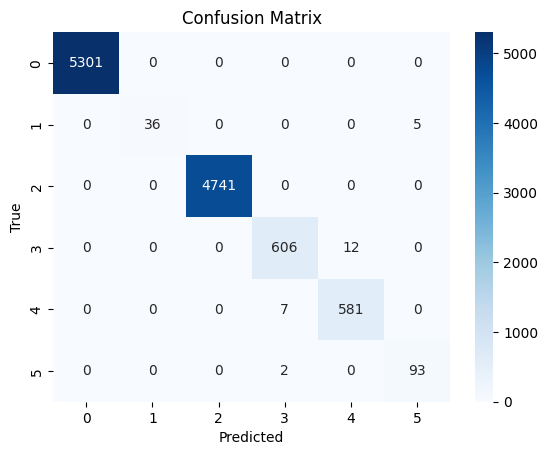

In [10]:
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="g")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    make_scorer,
    f1_score,
    precision_score,
    recall_score,
    accuracy_score,
)

# here we define different scorers metrics
scorer_f1 = make_scorer(f1_score, average="weighted")
scorer_precision = make_scorer(precision_score, average="weighted", zero_division=1)
scorer_recall = make_scorer(recall_score, average="weighted")
scorer_accuracy = make_scorer(accuracy_score)

# we save them in a dict for easier accessing
scorers = {
    "f1": scorer_f1,
    "precision": scorer_precision,
    "accuracy": scorer_accuracy,
    "recall": scorer_recall,
}
scores_results: dict = {}
for scorer_name, scorer in scorers.items():
    scores = cross_val_score(model2, X_train, y_train, cv=7, scoring=scorer)
    print(f"{scorer_name.capitalize()} scores:", scores)
    scores_results[scorer_name] = round(scores.mean(), 4)
    print(f"{scorer_name.capitalize()} mean:", round(scores.mean(), 4), "\n")

F1 scores: [0.99649    0.99500425 0.99754173 0.9953072  0.99377352 0.99753567
 0.99731801]
F1 mean: 0.9961 

Precision scores: [0.99815725 0.99303728 0.99764982 0.99764404 0.99764404 0.99764404
 0.99764404]
Precision mean: 0.9971 

Accuracy scores: [0.997543   0.995086   0.997543   0.99753695 0.99753695 0.99753695
 0.99753695]
Accuracy mean: 0.9972 

Recall scores: [0.997543   0.99262899 0.997543   0.99507389 0.99507389 0.99753695
 0.99753695]
Recall mean: 0.9961 



In [12]:
import pandas as pd

scores_df = pd.DataFrame.from_dict(scores_results, orient="index", columns=["Scores"])
scores_df

,Scores
f1,0.9961
precision,0.9971
accuracy,0.9972
recall,0.9961
